In [1]:
# importing important librarys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math
warnings.filterwarnings('ignore' )

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18

In [3]:
# importing dataframe
df = pd.read_csv("iris.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# checking is there any null values present
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#checking the duplicate values
df.duplicated().sum()

3

In [11]:
# drop the duplicated values
df= df.drop_duplicates()

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

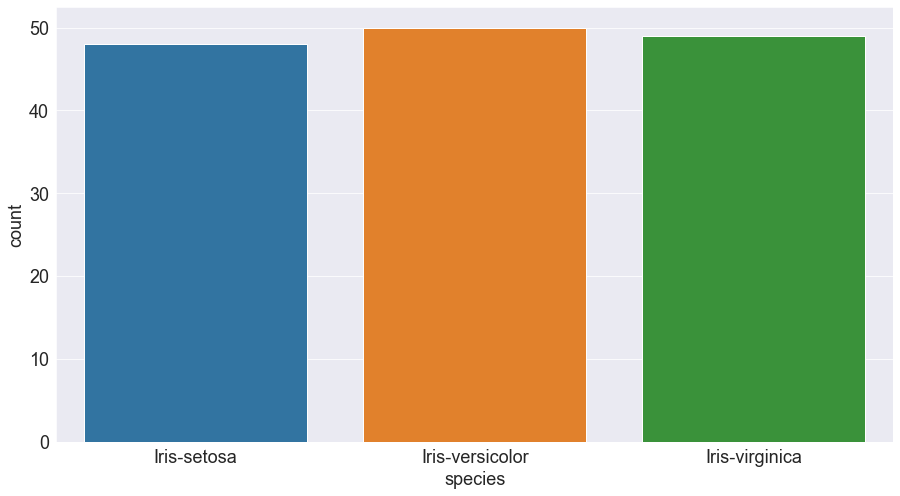

In [14]:
sns.countplot(df['species'])

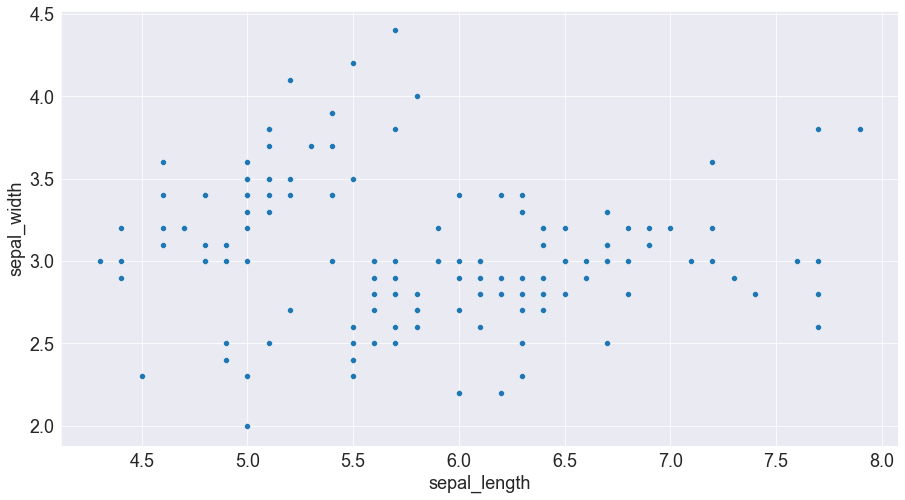

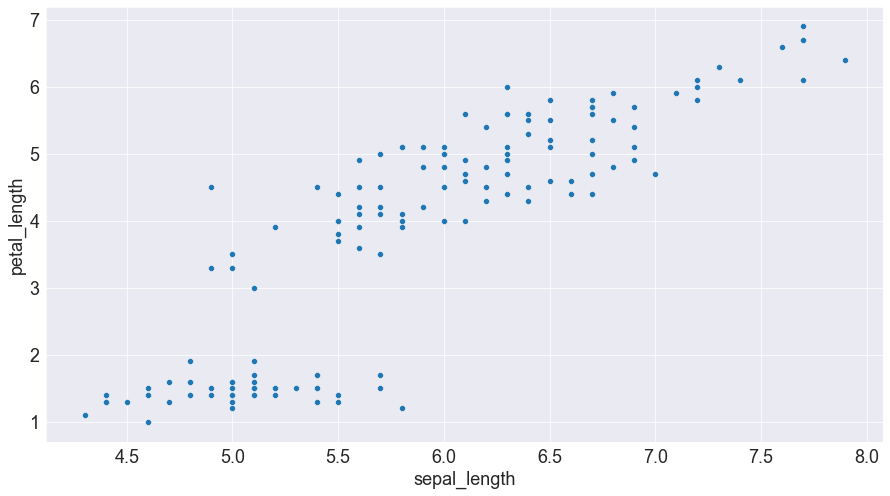

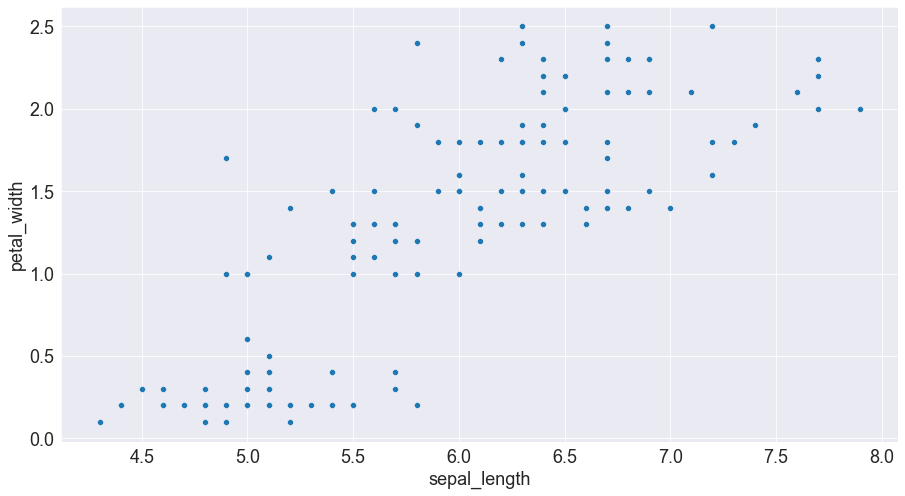

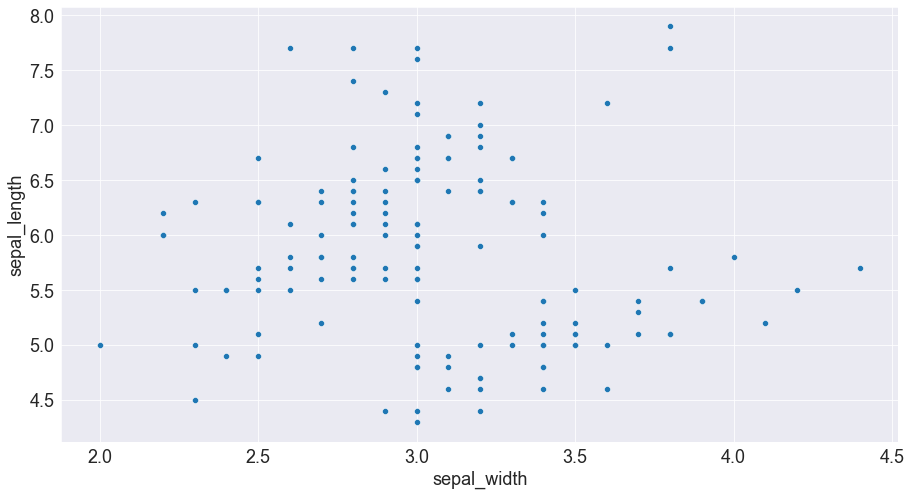

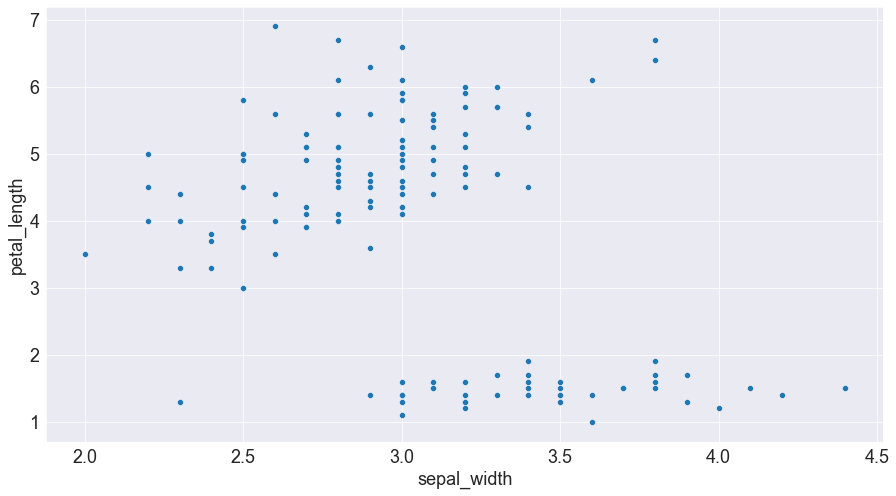

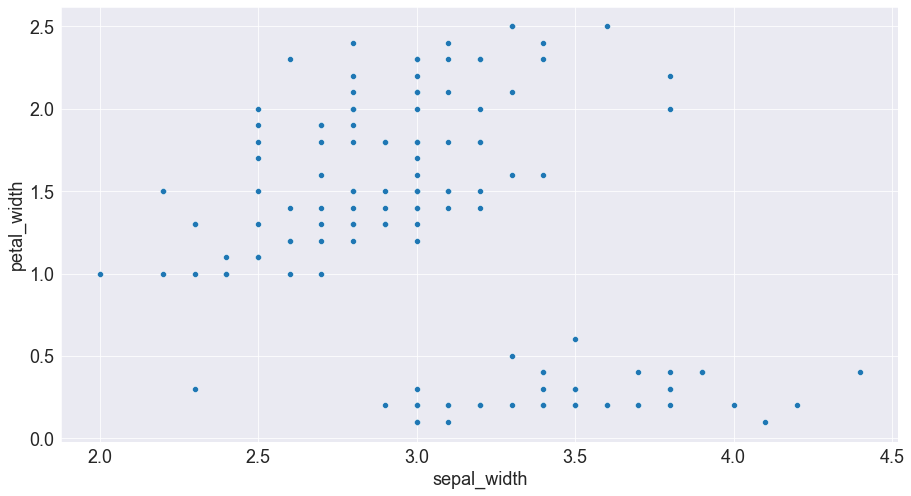

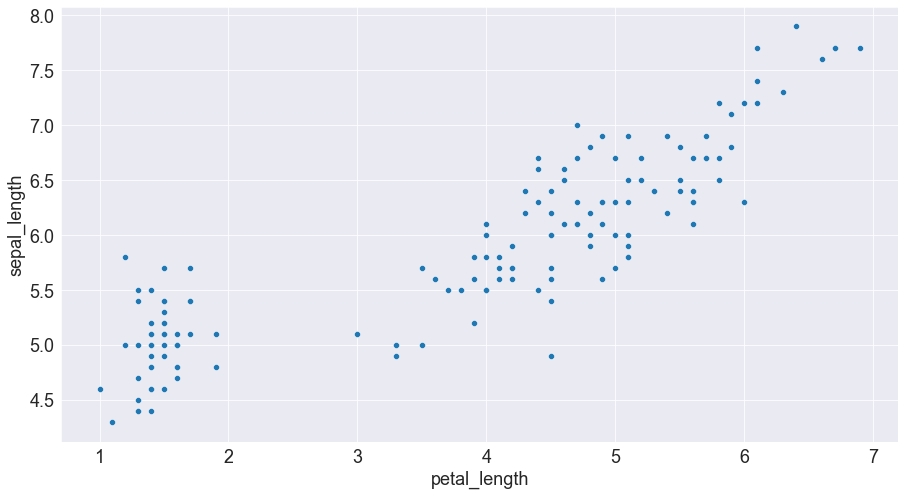

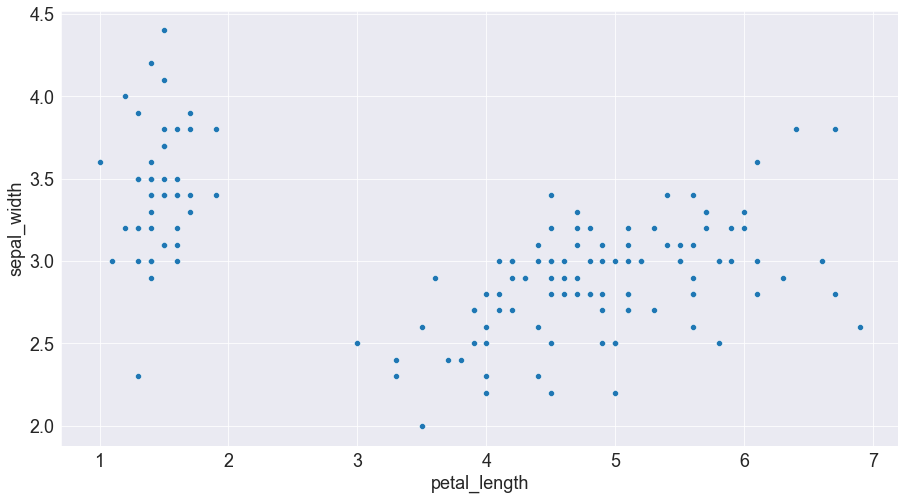

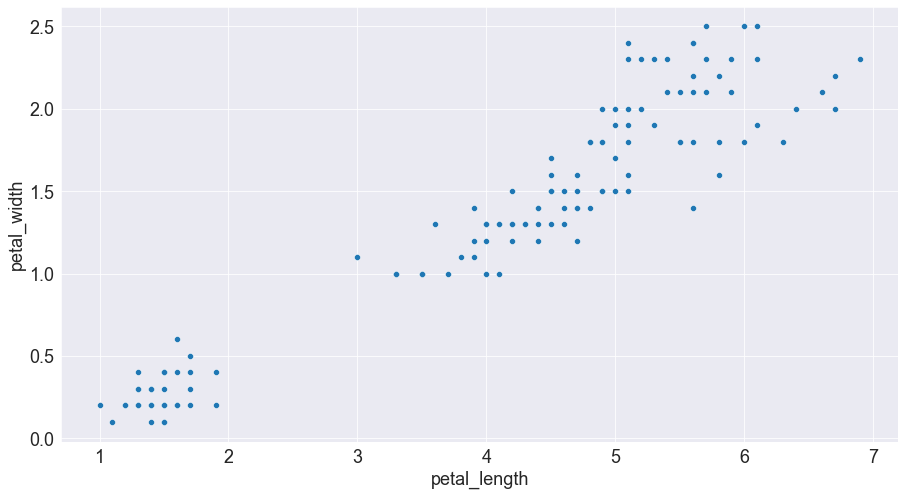

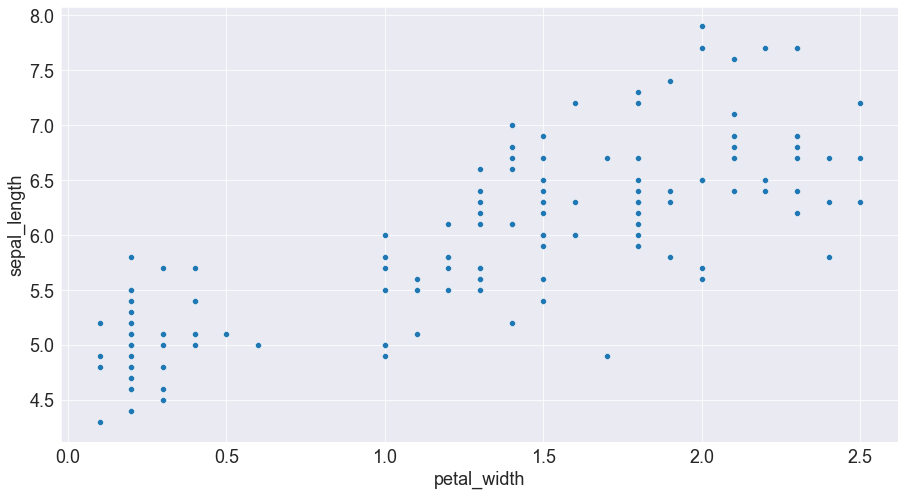

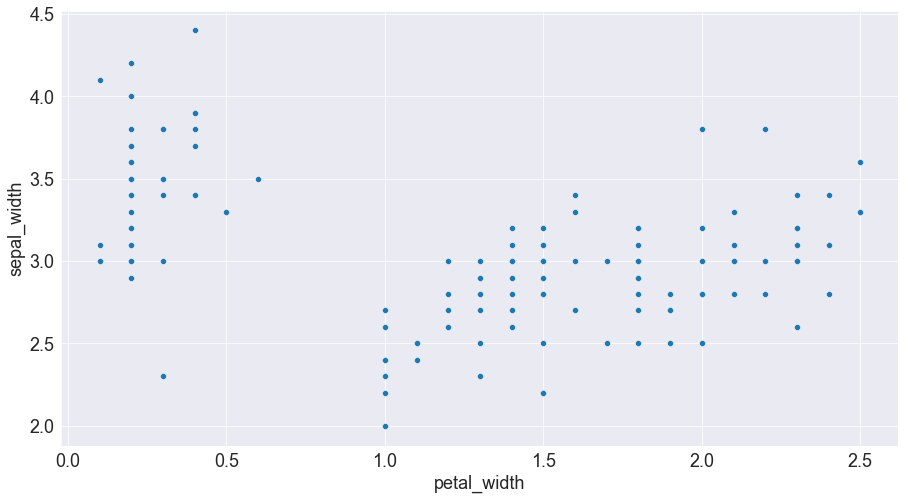

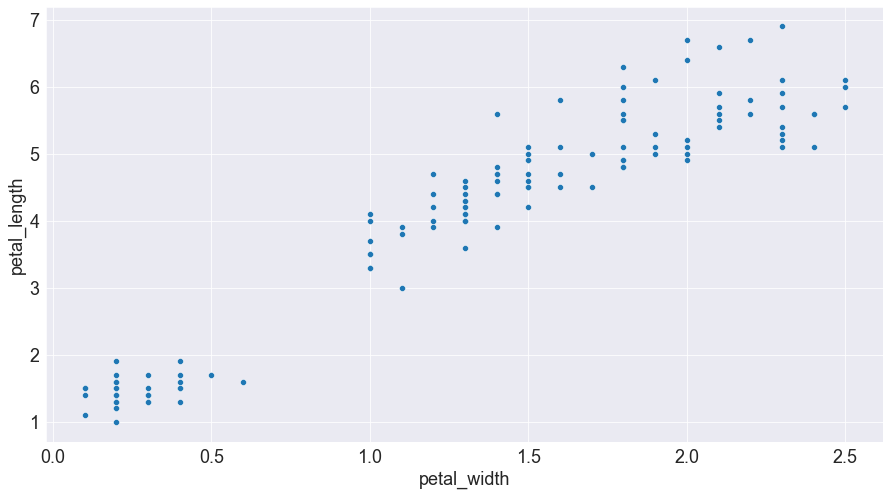

In [15]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in cols:
    for j in cols:
        if i == j:
            pass
        else:
            sns.scatterplot(df[i],df[j])
            plt.show()

In [16]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<AxesSubplot:>

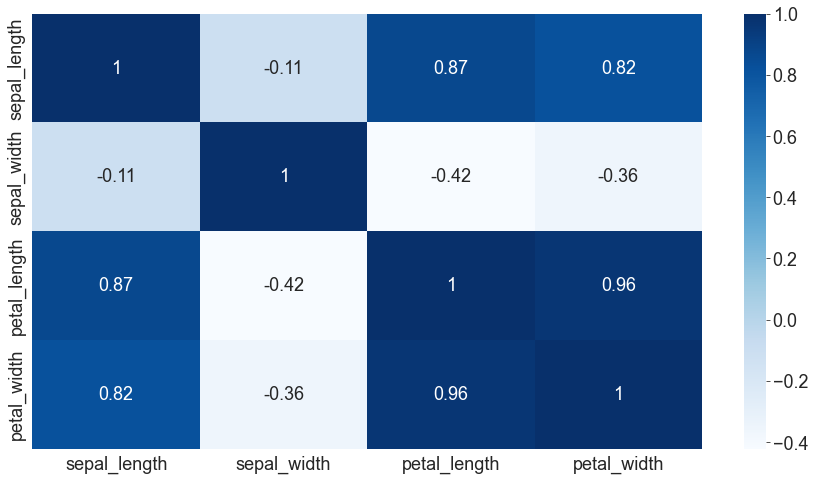

In [17]:
sns.heatmap(corr,annot=True,cmap="Blues")

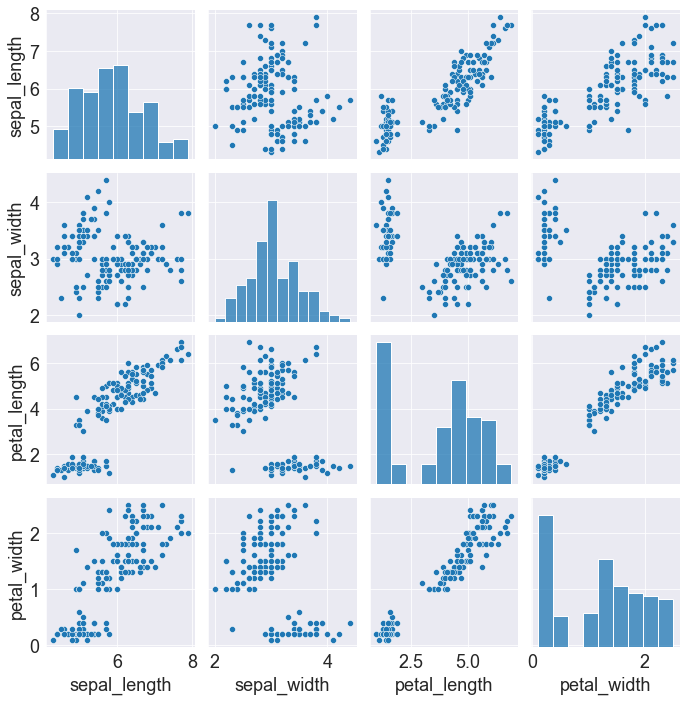

In [18]:
sns.pairplot(df)

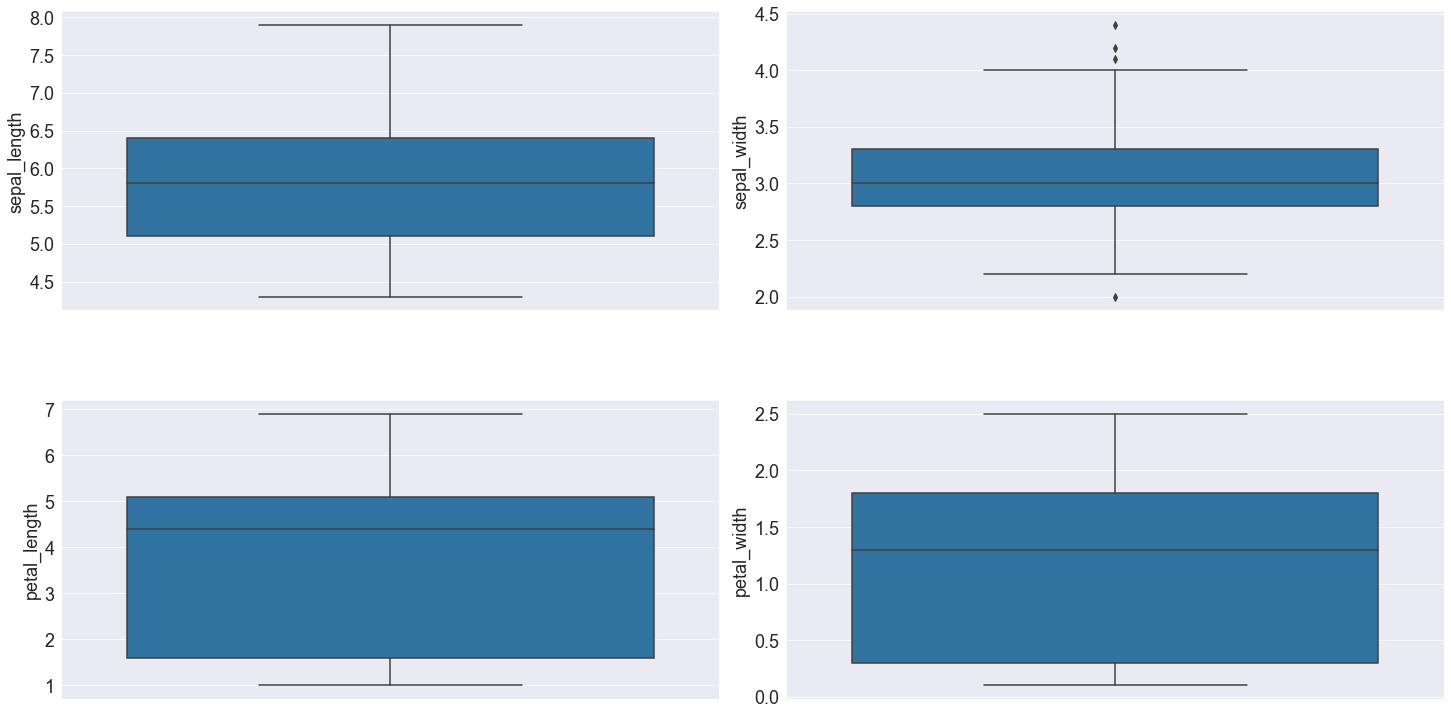

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in cols:
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


In [20]:
'''# removing outlies:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    df[col] = df[col].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
'''

'# removing outlies:\nfor col in cols:\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3-Q1\n    df[col] = df[col].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))\n'

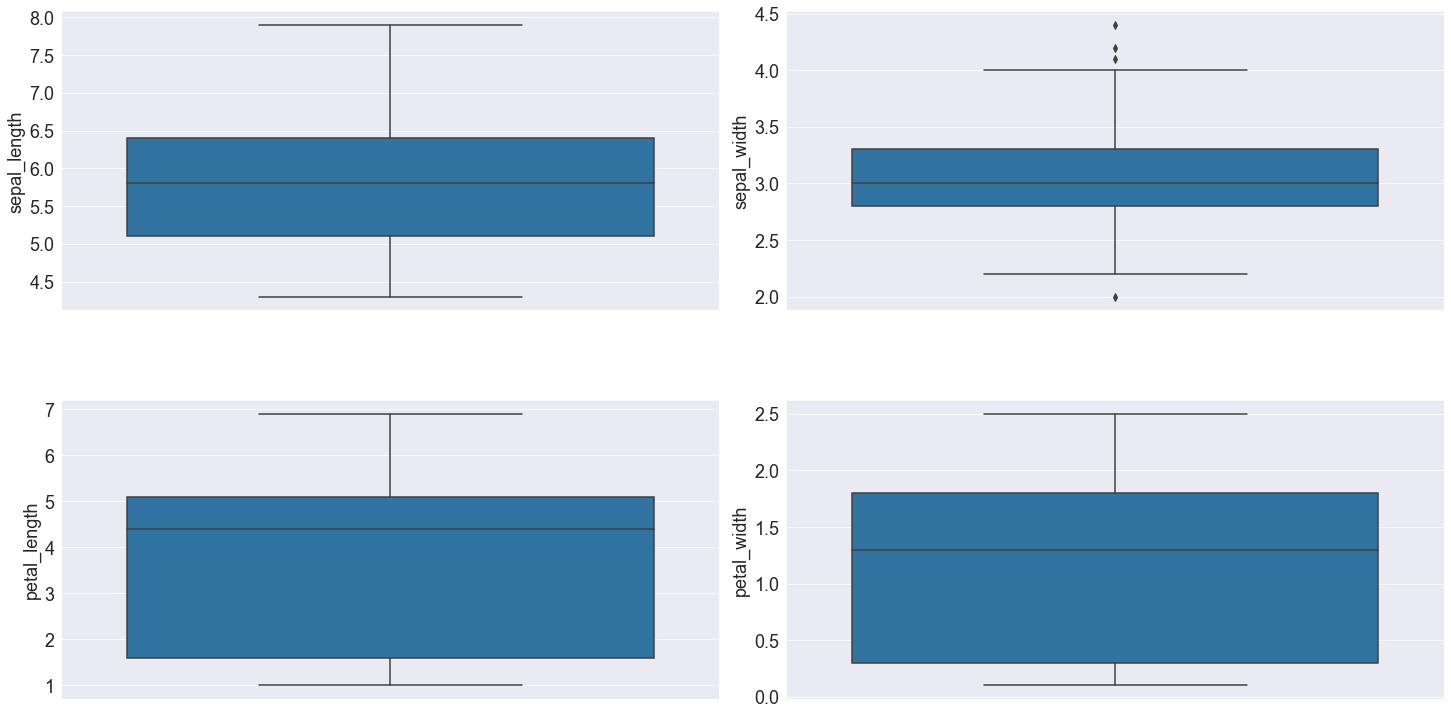

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in cols:
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Dendrogram

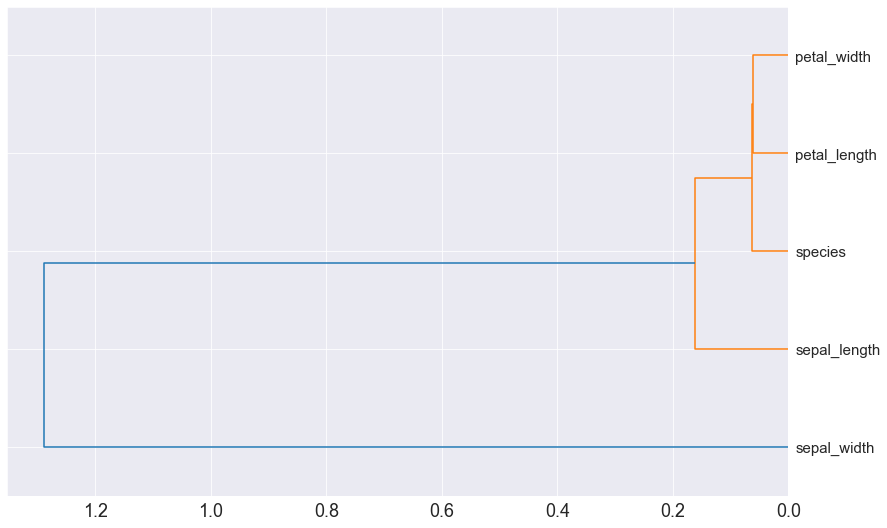

In [22]:
import scipy
from scipy import stats
from scipy.cluster import hierarchy
corr = np.round(scipy.stats.spearmanr(df).correlation,4)
corr_condensed = hierarchy.distance.squareform(1-corr) # non -ve val and compresed

plt.figure(figsize=(14,9))
hierarchy.dendrogram(hierarchy.linkage(corr_condensed,method='average'),
                     labels=df.columns,orientation='left',leaf_font_size=15)
plt.show()

In [23]:
df.corr()['sepal_width']

sepal_length   -0.109321
sepal_width     1.000000
petal_length   -0.421057
petal_width    -0.356376
Name: sepal_width, dtype: float64

<AxesSubplot:>

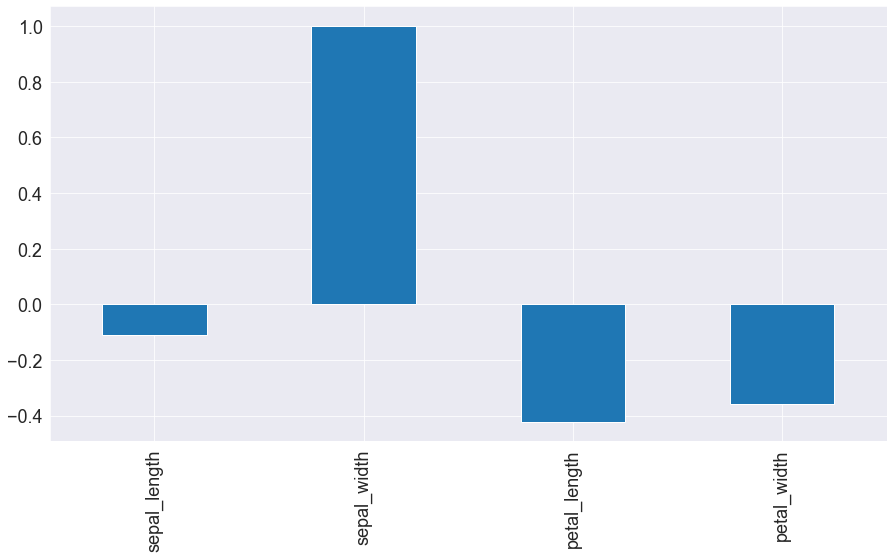

In [24]:
df.corr()['sepal_width'].plot(kind = "bar")

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
df['species']= encoder.fit_transform(df['species'])

In [27]:
X=df.drop(columns =["sepal_width",'species'])

y =df['sepal_width']

In [28]:
from sklearn.preprocessing import StandardScaler,quantile_transform,QuantileTransformer
scaler = StandardScaler()
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score,f1_score,r2_score,mean_squared_error,mean_absolute_error

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
def prediction_model(model):
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    model.score(X_test, y_test)
    print("{} Confidence: ".format(model),model.score(X_test,y_test))
    print("r2_scroce",r2_score(y_test,y_predict))
    print("Mean_square error = ",mean_squared_error(y_predict,y_test))
    print("square mean_square_error",math.sqrt(mean_squared_error(y_predict,y_test)))
    

# Linear Regression

In [32]:
prediction_model(LinearRegression())

LinearRegression() Confidence:  0.3693105312657091
r2_scroce 0.3693105312657091
Mean_square error =  0.12120480410802853
square mean_square_error 0.3481448033620903


# Lasso Regression

In [33]:
prediction_model(Lasso())

Lasso() Confidence:  -0.032123661739846154
r2_scroce -0.032123661739846154
Mean_square error =  0.19835172844648055
square mean_square_error 0.4453669593116227


# Ridge Regression

In [34]:
prediction_model(Ridge())

Ridge() Confidence:  0.3791129359525839
r2_scroce 0.3791129359525839
Mean_square error =  0.11932099504071583
square mean_square_error 0.34542871195185243


# DecisionTreeRegressor

In [35]:
prediction_model(DecisionTreeRegressor())

DecisionTreeRegressor() Confidence:  0.2226604828572667
r2_scroce 0.2226604828572667
Mean_square error =  0.14938775510204083
square mean_square_error 0.3865071216705338


# KNeighborsRegressor

In [36]:
prediction_model(KNeighborsRegressor())

KNeighborsRegressor() Confidence:  0.46860560877291824
r2_scroce 0.46860560877291824
Mean_square error =  0.10212244897959187
square mean_square_error 0.3195660322681243


# GradientBoostingRegressor

In [37]:
prediction_model(GradientBoostingRegressor())

GradientBoostingRegressor() Confidence:  0.4099677386227589
r2_scroce 0.4099677386227589
Mean_square error =  0.1133913727799611
square mean_square_error 0.3367363550018933


# RandomForestRegressor

In [38]:
prediction_model(RandomForestRegressor())

RandomForestRegressor() Confidence:  0.429778774218718
r2_scroce 0.429778774218718
Mean_square error =  0.10958412244897922
square mean_square_error 0.3310349263279922


# XGBRFRegressor

In [39]:
prediction_model(XGBRFRegressor())

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...) Confidence:  0.43184916249203364
r2_scroce 0.43184916249203364
Mean_square error =  0.10918623883503784
square mean_square_error 0.3304334105913593


# SVR

In [40]:
prediction_model(SVR())

SVR() Confidence:  0.501039361666995
r2_scroce 0.501039361666995
Mean_square error =  0.09588938681366728
square mean_square_error 0.309660114986847


# SGDRegressor

In [41]:
prediction_model(SGDRegressor())

SGDRegressor() Confidence:  0.22404669521854914
r2_scroce 0.22404669521854914
Mean_square error =  0.14912135522376388
square mean_square_error 0.38616234309389086


# Neural_network

In [42]:
prediction_model(MLPRegressor())

MLPRegressor() Confidence:  0.04174905804607609
r2_scroce 0.04174905804607609
Mean_square error =  0.18415499776608896
square mean_square_error 0.42913284396103846


In [43]:
import lightgbm as lgbm
import xgboost as xg

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='uniform'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor(),LinearRegression(),Lasso(),RandomForestRegressor(),DecisionTreeRegressor(),SGDRegressor(),SVR(),Ridge()]
score=[]
for a in algo:
    score.append(boost_models(a))

#Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'r2-Score', 'MAE', 'RMSE'])

,Model,r2-Score,MAE,RMSE
0,GradientBoostingRegressor,0.442,0.24,0.33
1,LGBMRegressor,0.180,0.31,0.40
2,XGBRFRegressor,0.458,0.23,0.32
3,LinearRegression,0.318,0.29,0.36
4,Lasso,-0.061,0.35,0.45
5,RandomForestRegressor,0.444,0.22,0.33
6,DecisionTreeRegressor,0.189,0.31,0.39
7,SGDRegressor,0.008,0.35,0.44
8,SVR,0.444,0.24,0.33
9,Ridge,0.299,0.29,0.37
